#  Лабораторная работа №2 «ДВПФ и ДПФ»
Курс: «Радиофизическая лаборатория» ФРКТ МФТИ


In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft
from scipy import integrate

In [2]:
# Если используете Jupyter, то можно поменять backend
%matplotlib notebook


In [3]:
%matplotlib inline

# Занятие 1. Основные свойства ДВПФ
Далее значения $N$, $L$, ${{\nu }_{0}}$ следует использовать из таблицы в соответствии с Вашим вариантом задания.

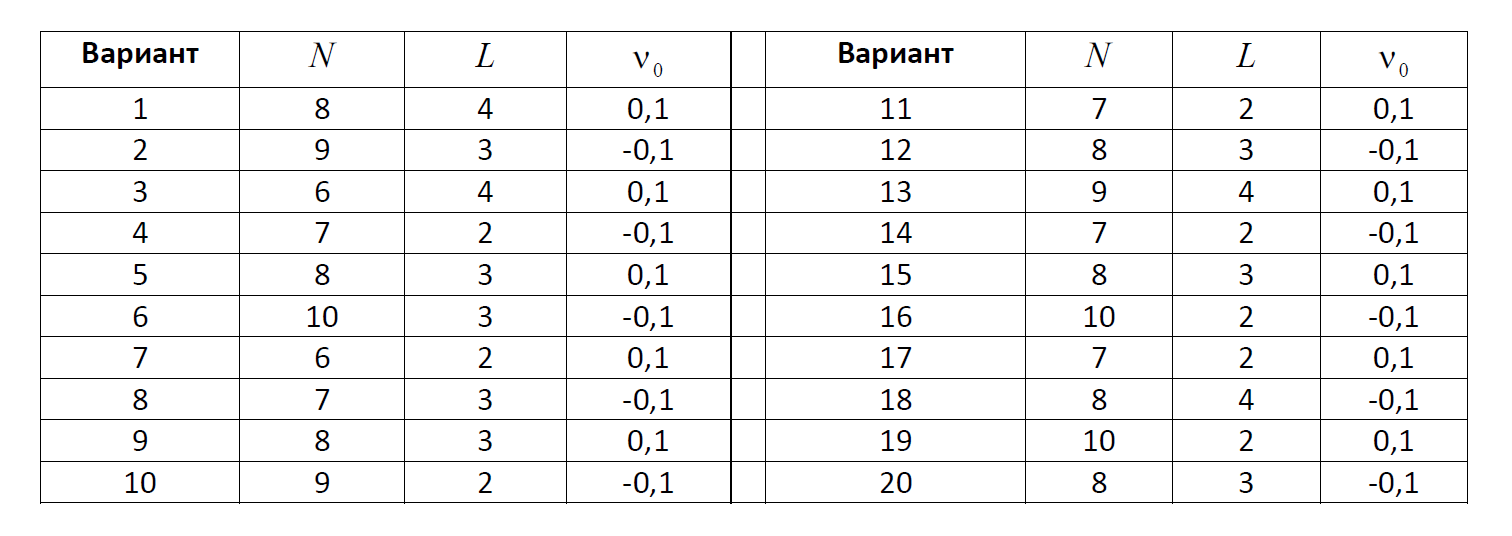

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

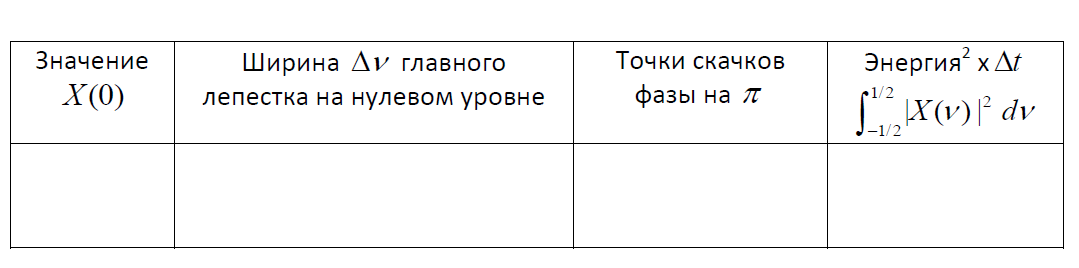

$^2$ Для дискретного сигнала рассматривают энергию, приходящуюся на один период частоты, т.е. на полосу частот шириной ${{f}_{\text{д}}}$:

$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $
Для ее вычисления можно воспользоваться равенством Парсеваля для ДВПФ. 


C:\Users\hokey\AppData\Local\Temp\ipykernel_17296\59115345.py:15: RuntimeWarning: invalid value encountered in divide
  return np.sin(N * np.pi * nu) / np.sin(np.pi * nu) * np.exp(-1j * (N - 1) * np.pi * nu)


Energy 9.0
9.0


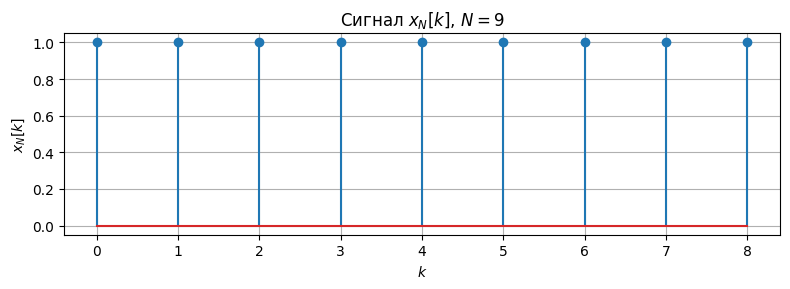

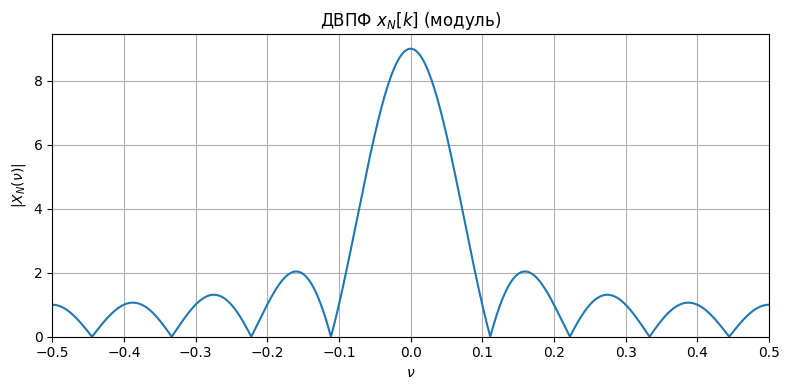

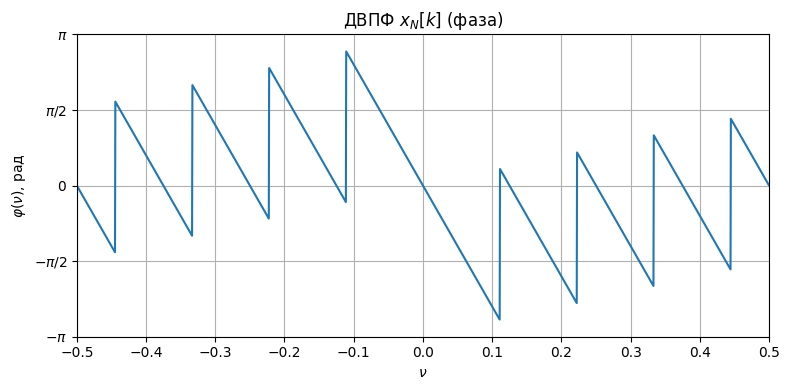

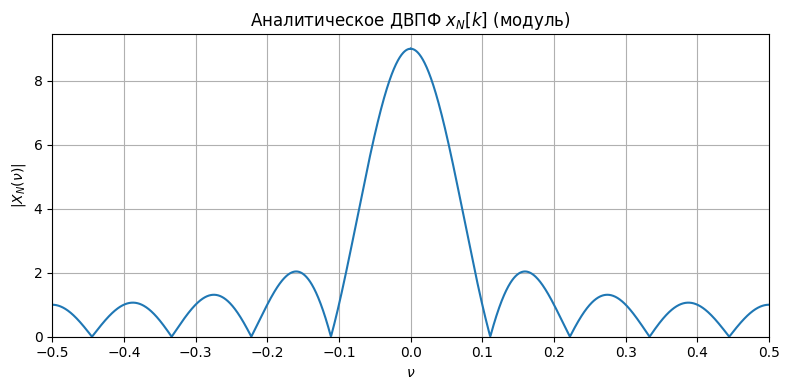

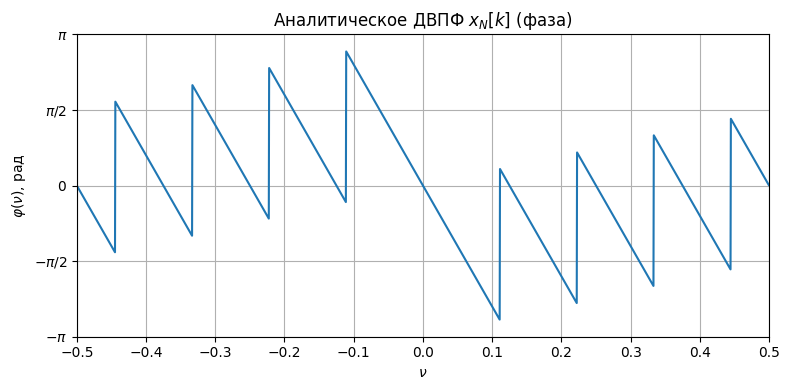

In [11]:
N = 9
L = 3
nu_0 = -0.1

x_N = np.ones(N)

def dtft(x, M=2048):
    return np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))


def func(nu):
    return np.sin(N * np.pi * nu) / np.sin(np.pi * nu) * np.exp(-1j * (N - 1) * np.pi * nu)


k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, x_N)
plt.title(f'Сигнал $x_N[k]$, $N = {N}$')
plt.xlabel('$k$')
plt.ylabel('$x_N[k]$')
plt.xticks(np.linspace(0, N - 1, N))
plt.grid()
plt.tight_layout()


nu_N, X_N = dtft(x_N, M=2048)

plt.figure(figsize=[8, 4])
plt.plot(nu_N, abs(X_N))
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ $x_N[k]$ (модуль)')
plt.xlabel('$\\nu$')
plt.ylabel('$|X_N(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

zeros = []
absX = abs(X_N)

zeros.append(nu_N[0])
for i in range(1, len(absX) - 1):
    if absX[i] < absX[i - 1] and absX[i] < absX[i + 1]:
        zeros.append(nu_N[i])
        
zeros.append(nu_N[-1])

plt.figure(figsize=[8, 4])
plt.plot(nu_N, np.angle(X_N))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ $x_N[k]$ (фаза)')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()


X_N_theory = func(nu_N)

plt.figure(figsize=[8, 4])
plt.plot(nu_N, abs(X_N_theory))
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('Аналитическое ДВПФ $x_N[k]$ (модуль)')
plt.xlabel('$\\nu$')
plt.ylabel('$|X_N(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 4])
plt.plot(nu_N, np.angle(X_N_theory))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('Аналитическое ДВПФ $x_N[k]$ (фаза)')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()


EnergyOrig = sum(x_N ** 2)
print(f"Energy {EnergyOrig}")

print (max (abs(X_N)))


| Значение $X(0)$ | Ширина $\Delta \nu$ главного лепестка на нулевом уровне | Точки скачков фазы на $\pi$ | Энергия $\dfrac{1}{\Delta t} \displaystyle \int\limits_{-1/2}^{1/2}$ &#124; $X(\nu)$ &#124; $^2 d\nu$ |
| :---------------: | :-----------: | :---------------------------: | :-------------------: |
| 9          | 0.2       | 0.1 k         |  9       |


## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


C:\Users\hokey\AppData\Local\Temp\ipykernel_17296\59115345.py:15: RuntimeWarning: invalid value encountered in divide
  return np.sin(N * np.pi * nu) / np.sin(np.pi * nu) * np.exp(-1j * (N - 1) * np.pi * nu)


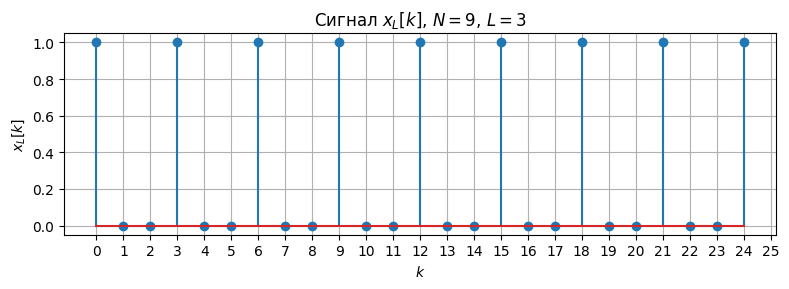

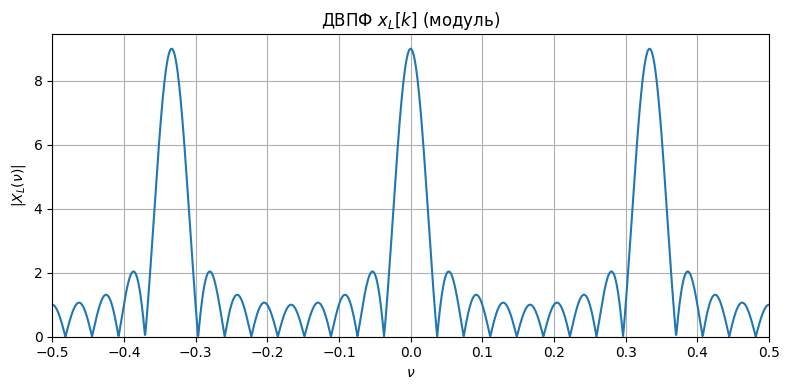

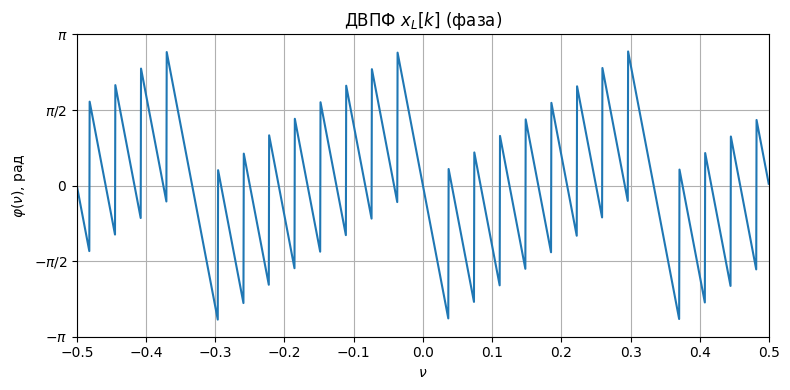

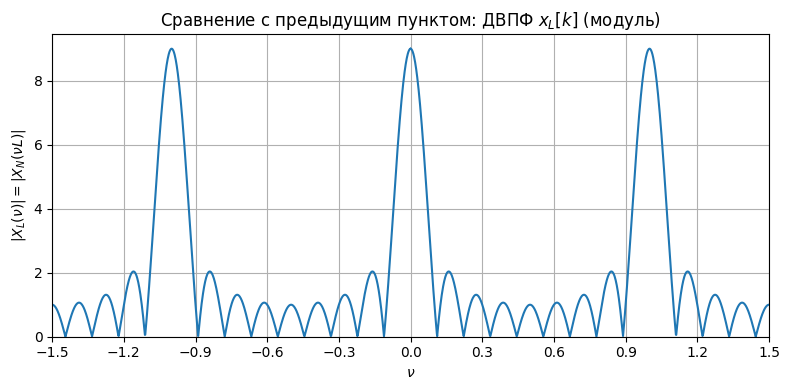

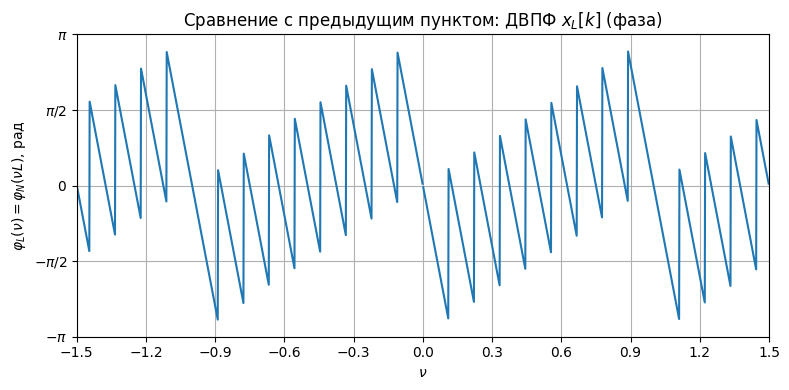

In [15]:
x_L = []

x_L.append(x_N[0])
for m in range(1, len(x_N)):
    for k in range(0, L - 1):
        x_L.append(0)
    x_L.append(x_N[m])

    
k = np.arange(N * L - L + 1)
plt.figure(figsize=[8, 3])
plt.stem(k, x_L)
plt.title(f'Сигнал $x_L[k]$, $N = {N}$, $L = {L}$')
plt.xlabel('$k$')
plt.ylabel('$x_L[k]$')
plt.xticks(np.linspace(0, N * L - 2, N * L - 1))
plt.grid()
plt.tight_layout()


nu_L, X_L = dtft(x_L, M=2048)

plt.figure(figsize=[8, 4])
plt.plot(nu_L, abs(X_L))
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ $x_L[k]$ (модуль)')
plt.xlabel('$\\nu$')
plt.ylabel('$|X_L(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()


plt.figure(figsize=[8, 4])
plt.plot(nu_L, np.angle(X_L))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ $x_L[k]$ (фаза)')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()


nu_NL = nu_N * L
X_L_theory = func(nu_NL)

plt.figure(figsize=[8, 4])
plt.plot(nu_NL, abs(X_L_theory))
plt.xlim([-0.5 * L, 0.5 * L])
plt.ylim(bottom=0)
plt.title('Сравнение с предыдущим пунктом: ДВПФ $x_L[k]$ (модуль)')
plt.xlabel('$\\nu$')
plt.ylabel('$|X_L(\\nu)| = |X_N(\\nu L)|$')
plt.xticks(np.linspace(-0.5 * L, 0.5 * L, 11))
plt.grid()
plt.tight_layout()


plt.figure(figsize=[8, 4])
plt.plot(nu_NL, np.angle(X_L_theory))
plt.xlim([-0.5 * L, 0.5 * L])
plt.ylim([-np.pi, np.pi])
plt.title('Сравнение с предыдущим пунктом: ДВПФ $x_L[k]$ (фаза)')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi_L(\\nu) = \\varphi_N(\\nu L)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5 * L, 0.5 * L, 11))
plt.grid()
plt.tight_layout()

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$ 


C:\Users\hokey\AppData\Local\Temp\ipykernel_17296\1787037923.py:44: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-1j * (N - 1) * np.pi * nu) * (N * np.pi * np.cos(np.pi * nu * N) / np.sin(np.pi * nu) - np.pi * (np.cos(np.pi * nu) * np.sin(np.pi * N * nu)) / (np.sin(np.pi * nu) ** 2) - np.sin(np.pi * nu * N) / np.sin(np.pi * nu) * 1j * (N - 1) * pi)
C:\Users\hokey\AppData\Local\Temp\ipykernel_17296\1787037923.py:44: RuntimeWarning: invalid value encountered in divide
  return np.exp(-1j * (N - 1) * np.pi * nu) * (N * np.pi * np.cos(np.pi * nu * N) / np.sin(np.pi * nu) - np.pi * (np.cos(np.pi * nu) * np.sin(np.pi * N * nu)) / (np.sin(np.pi * nu) ** 2) - np.sin(np.pi * nu * N) / np.sin(np.pi * nu) * 1j * (N - 1) * pi)


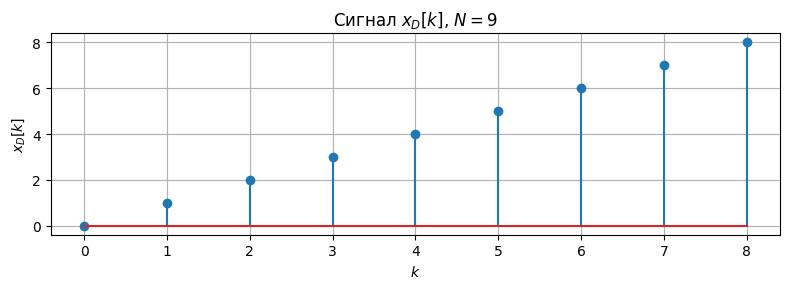

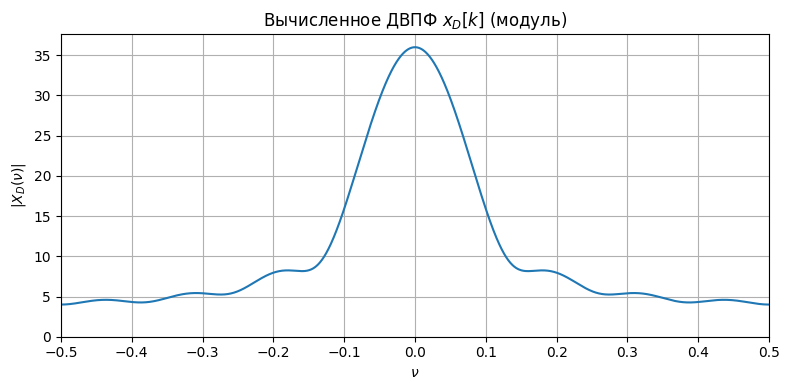

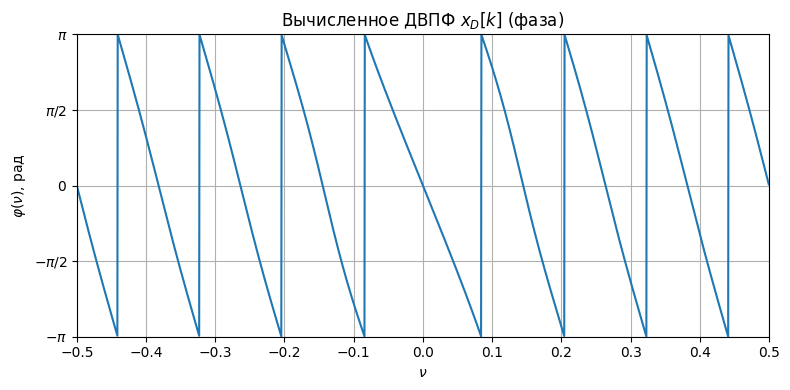

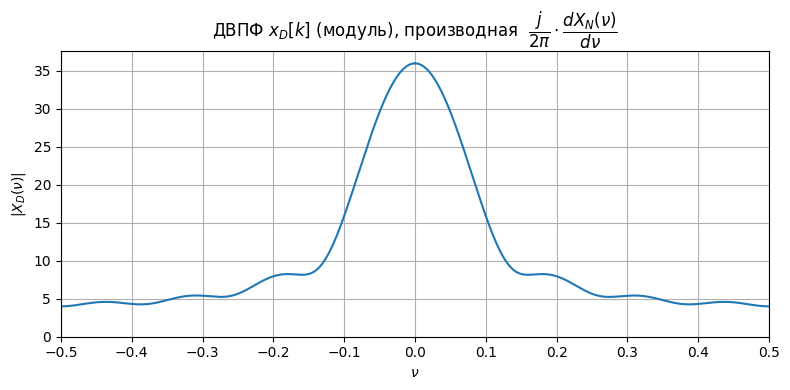

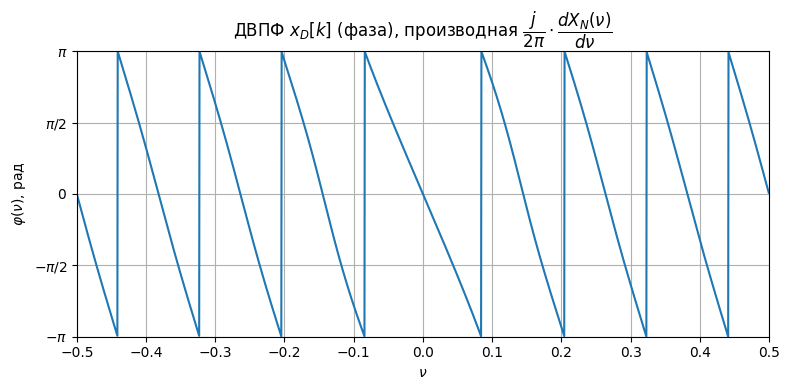

In [18]:
x_D = np.zeros(len(x_N))

for k in range(0, len(x_N)):
    x_D[k] = k * x_N[k]


k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, x_D)
plt.title(f'Сигнал $x_D[k]$, $N = {N}$')
plt.xlabel('$k$')
plt.ylabel('$x_D[k]$')
plt.xticks(np.linspace(0, N - 1, N))
plt.grid()
plt.tight_layout()

nu_D, X_D = dtft(x_D, M=2048)

plt.figure(figsize=[8, 4])
plt.plot(nu_D, abs(X_D))
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('Вычисленное ДВПФ $x_D[k]$ (модуль)')
plt.xlabel('$\\nu$')
plt.ylabel('$|X_D(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()


plt.figure(figsize=[8, 4])
plt.plot(nu_D, np.angle(X_D))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('Вычисленное ДВПФ $x_D[k]$ (фаза)')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

def func(nu):
    return np.exp(-1j * (N - 1) * np.pi * nu) * (N * np.pi * np.cos(np.pi * nu * N) / np.sin(np.pi * nu) - np.pi * (np.cos(np.pi * nu) * np.sin(np.pi * N * nu)) / (np.sin(np.pi * nu) ** 2) - np.sin(np.pi * nu * N) / np.sin(np.pi * nu) * 1j * (N - 1) * pi)


X_D_Analytic = 1j / (2 * np.pi) * func(nu_D)

plt.figure(figsize=[8, 4])
plt.plot(nu_D, abs(X_D_Analytic))
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ $x_D[k]$ (модуль), производная  $\\dfrac{j}{2\\pi} \cdot \dfrac{dX_N(\\nu)}{d\\nu}$')
plt.xlabel('$\\nu$')
plt.ylabel('$|X_D(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()


plt.figure(figsize=[8, 4])
plt.plot(nu_D, np.angle(X_D_Analytic))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ $x_D[k]$ (фаза), производная $\\dfrac{j}{2\\pi} \cdot \dfrac{dX_N(\\nu)}{d\\nu}$')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?

б) Как результат моделирования соотносится с теоремой смещения для ДВПФ? 

в) Почему получившийся спектр не симметричен относительно нулевой частоты? 


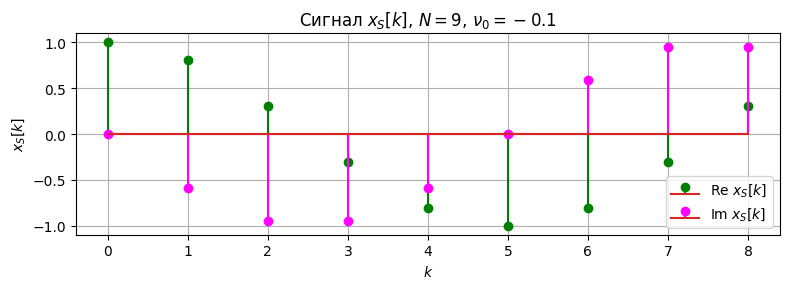

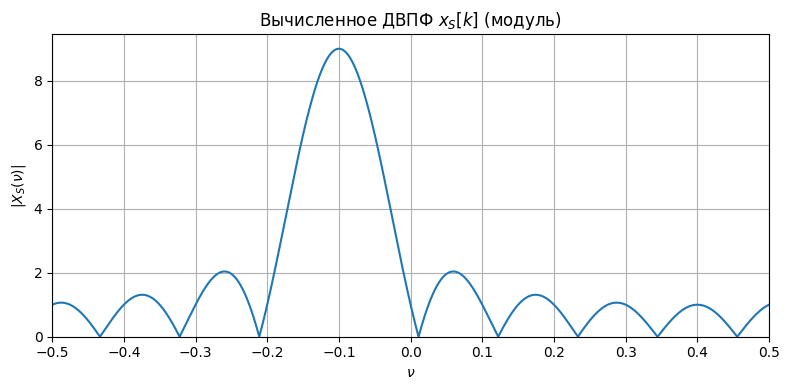

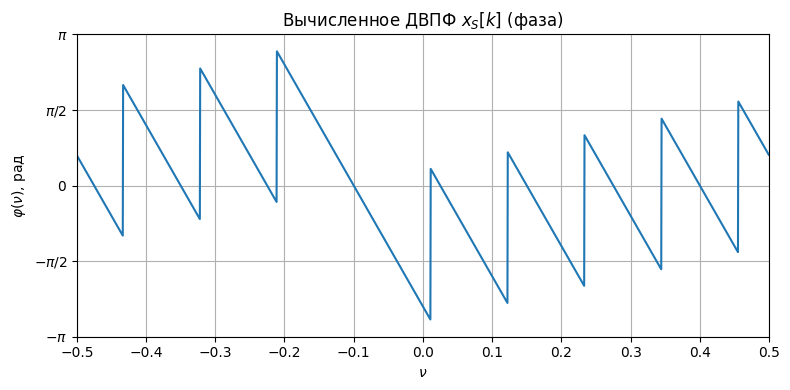

In [19]:
x_S = np.zeros(len(x_N), dtype=complex)

for k in range(0, len(x_N)):
    x_S[k] = x_N[k] * np.exp(1j * 2 * np.pi * nu_0 * k)
    

k = np.arange(N)
plt.figure(figsize=[8, 3])

markerline, stemlines, baseline = plt.stem(k, np.real(x_S), label='Re $x_S[k]$')
plt.setp(markerline, 'color', 'green')
plt.setp(stemlines, 'color', 'green')

markerline, stemlines, baseline = plt.stem(k, np.imag(x_S), label='Im $x_S[k]$')
plt.setp(markerline, 'color', 'magenta')
plt.setp(stemlines, 'color', 'magenta')

plt.title(f'Сигнал $x_S[k]$, $N = {N}$, $\\nu_0 = -0.1$')
plt.xlabel('$k$')
plt.ylabel('$x_S[k]$')
plt.xticks(np.linspace(0, N - 1, N))
plt.grid()
plt.legend()
plt.tight_layout()

nu_S, X_S = dtft(x_S, M=2048)

plt.figure(figsize=[8, 4])
plt.plot(nu_S, abs(X_S))
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('Вычисленное ДВПФ $x_S[k]$ (модуль)')
plt.xlabel('$\\nu$')
plt.ylabel('$|X_S(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()


plt.figure(figsize=[8, 4])
plt.plot(nu_S, np.angle(X_S))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('Вычисленное ДВПФ $x_S[k]$ (фаза)')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

* а) $X_S(\nu) = X_N(\nu - \nu_0) = \dfrac{\sin{\left(N \pi (\nu - \nu_0)\right)}}{\sin{\left(\pi (\nu - \nu_0)\right)}}\exp{\left(-j(N - 1)\pi (\nu - \nu_0)\right)}$
* б) Умножение сигнала на комплексную экспоненту вида $\exp{(j2\pi\nu_0 k)}$ привело к сдвигу спектральной функции вдоль оси частот на $\nu_0$. В нашем случае вправо, поскольку $\nu_0 = -0.1 < 0$
* в) Получившийся спектр несимметричен относительно нулевой частоты, так как он не является чисто действительным. За счет умножения на комплексную экспоненту в сигнале появляется и мнимая часть

## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

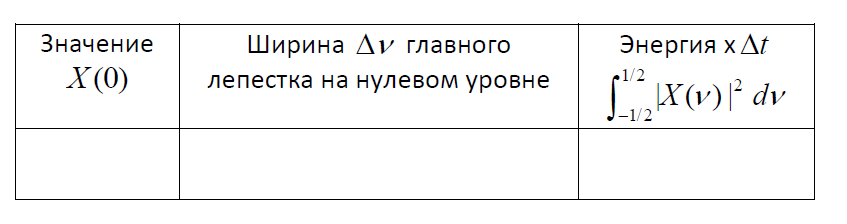

Energy: 489.0
81.0


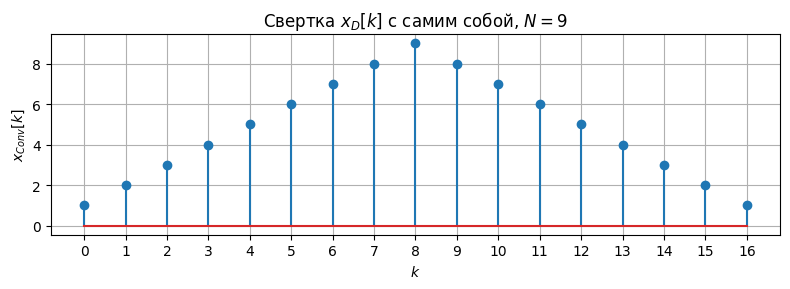

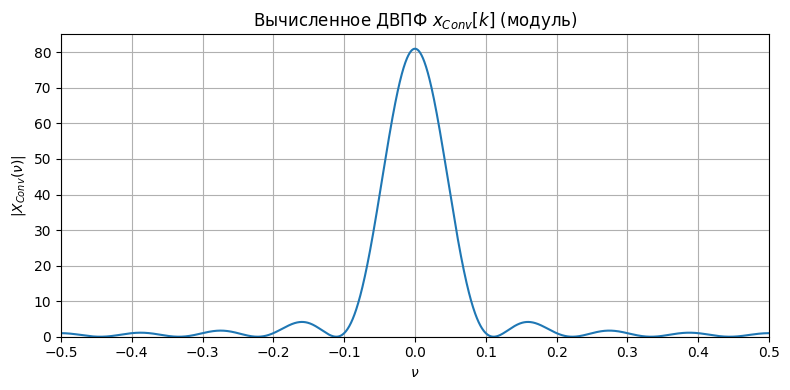

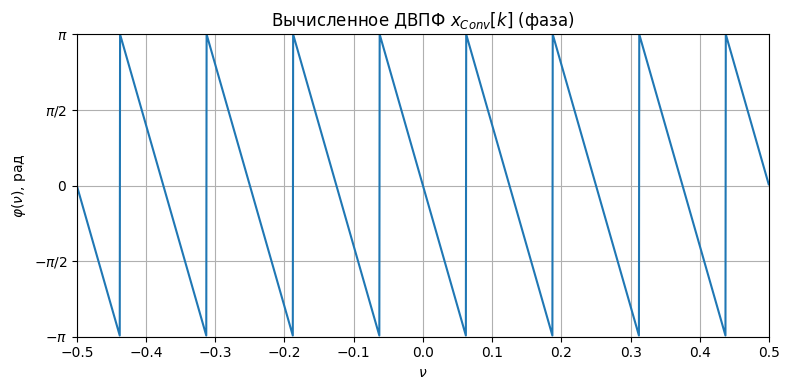

In [22]:
x_Conv = signal.convolve(x_N, x_N)

k = np.arange(len(x_Conv))
plt.figure(figsize=[8, 3])
plt.stem(k, x_Conv)
plt.title(f'Свертка $x_D[k]$ с самим собой, $N = {N}$')
plt.xlabel('$k$')
plt.ylabel('$x_{Conv}[k]$')
plt.xticks(np.linspace(0, len(x_Conv) - 1, len(x_Conv)))
plt.grid()
plt.tight_layout()

nu_Conv, X_Conv = dtft(x_Conv, M=2048)

plt.figure(figsize=[8, 4])
plt.plot(nu_Conv, abs(X_Conv))
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('Вычисленное ДВПФ $x_{Conv}[k]$ (модуль)')
plt.xlabel('$\\nu$')
plt.ylabel('$|X_{Conv}(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()


plt.figure(figsize=[8, 4])
plt.plot(nu_Conv, np.angle(X_Conv))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('Вычисленное ДВПФ $x_{Conv}[k]$ (фаза)')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()


EnergyOrig = sum(x_Conv ** 2)
print(f"Energy: {EnergyOrig}")
print (max (abs (X_Conv)))

| Значение $X(0)$ | Ширина $\Delta \nu$ главного лепестка на нулевом уровне |Энергия $\dfrac{1}{\Delta t} \displaystyle \int\limits_{-1/2}^{1/2}$ &#124; $X(\nu)$ &#124; $^2 d\nu$ |
| :---------------: | :-----------: |  :-------------------: |
| 81          | 0.2       |    489       |


# Занятие 2. Основные свойства ДПФ

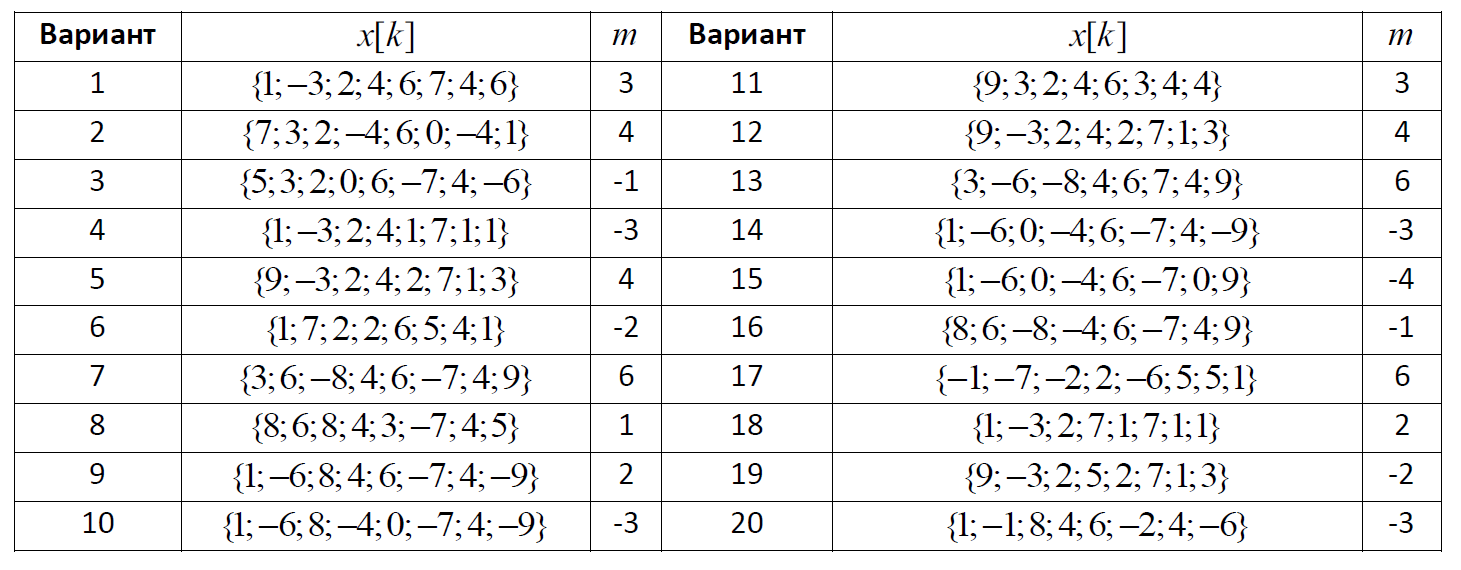

## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты. 


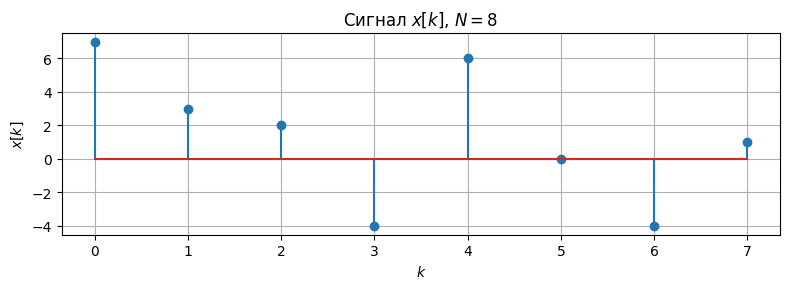

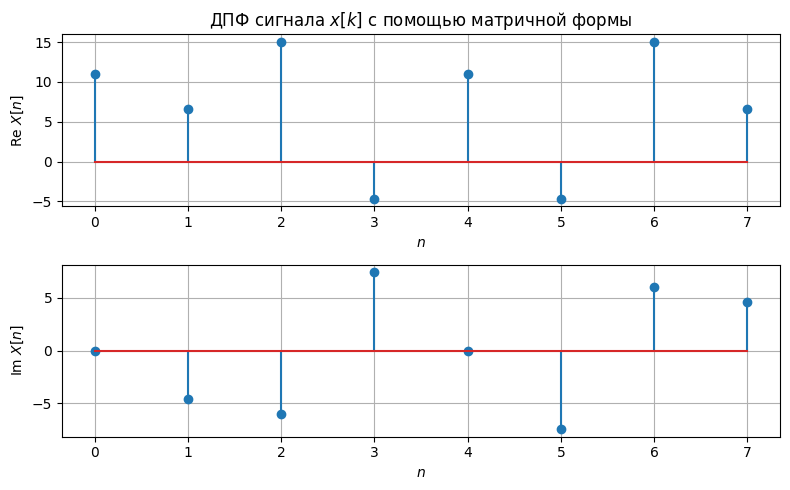

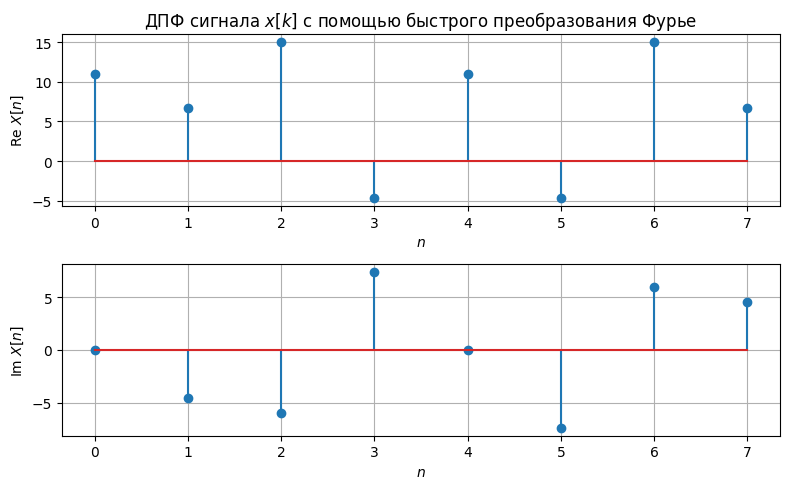

In [23]:
x = np.array([7, 3, 2, -4, 6, 0, -4, 1])
m = 4

N = len(x)
k = np.arange(len(x))
plt.figure(figsize=[8, 3])
plt.stem(k, x)
plt.title(f'Сигнал $x[k]$, $N = {N}$')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.xticks(np.linspace(0, len(x) - 1, len(x)))
plt.grid()
plt.tight_layout()

W = dft(N)

X = W @ x

plt.figure(figsize=[8, 5])

n = np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, X.real)
plt.xticks(n)
plt.title('ДПФ сигнала $x[k]$ с помощью матричной формы')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, X.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')
plt.grid()

plt.tight_layout()

X_FFT = np.fft.fft(x)

plt.figure(figsize=[8, 5])

n = np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, X_FFT.real)
plt.xticks(n)
plt.title('ДПФ сигнала $x[k]$ с помощью быстрого преобразования Фурье')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, X_FFT.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')
plt.grid()

plt.tight_layout()

## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ. 


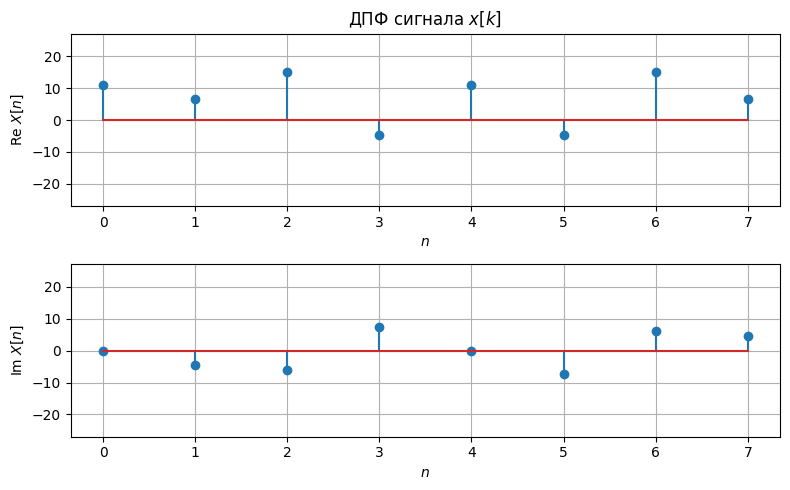

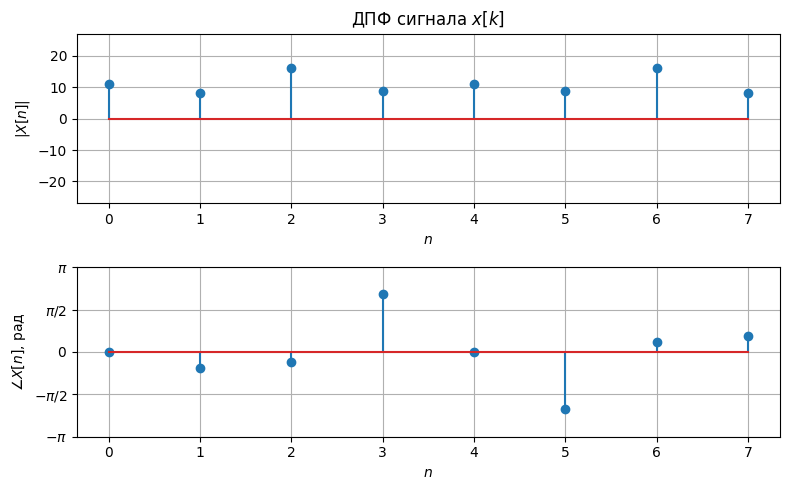

In [24]:
plt.figure(figsize=[8, 5])

n = np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, X.real)
plt.xticks(n)
plt.title('ДПФ сигнала $x[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.ylim([-27, 27])
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, X.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')
plt.ylim([-27, 27])
plt.grid()

plt.tight_layout()

plt.figure(figsize=[8, 5])

n = np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, abs(X))
plt.xticks(n)
plt.title('ДПФ сигнала $x[k]$')
plt.xlabel('$n$')
plt.ylabel('$|X[n]|$')
plt.ylim([-27, 27])
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, np.angle(X))
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('$\\angle X[n]$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.grid()

plt.tight_layout()

Здесь мы видим симметрию действительной части и модуля относительно отсчета с номером $n = 4$

Для мнимой части и аргумента наблюдается антисимметрия относительно того же отсчета $n = 4$

## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 


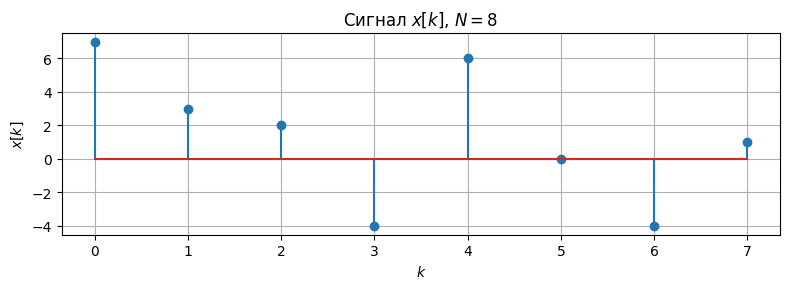

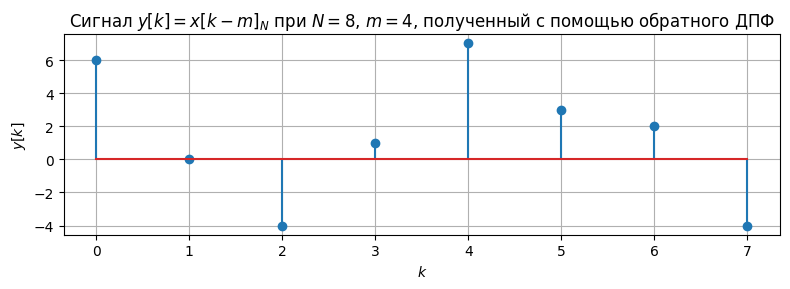

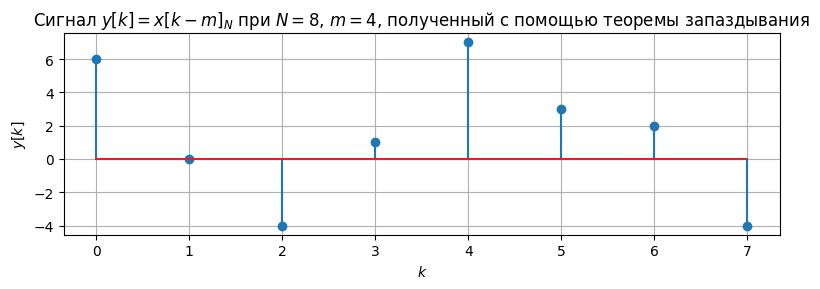

In [26]:
N = len(x)
k = np.arange(len(x))
plt.figure(figsize=[8, 3])
plt.stem(k, x)
plt.title(f'Сигнал $x[k]$, $N = {N}$')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.xticks(np.linspace(0, len(x) - 1, len(x)))
plt.grid()
plt.tight_layout()

Y = np.zeros(len(X), dtype=complex)
for n in range(0, len(X)):
    Y[n] = np.exp(-1j * 2 * np.pi / 8 * m * n) * X[n]

y = np.fft.ifft(Y)

k = np.arange(len(y))
plt.figure(figsize=[8, 3])
plt.stem(k, y)
plt.title(f'Сигнал $y[k] = x[k - m]_N$ при $N = {N}$, $m = {m}$, полученный с помощью обратного ДПФ')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.xticks(np.linspace(0, len(y) - 1, len(y)))
plt.grid()
plt.tight_layout()

y = np.zeros(N)
for k in range(0, N):
    y[k] = x[(k - m) % N]
    
k = np.arange(len(y))
plt.figure(figsize=[8, 3])
plt.stem(k, y)
plt.title(f'Сигнал $y[k] = x[k - m]_N$ при $N = {N}$, $m = {m}$, полученный с помощью теоремы запаздывания')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.xticks(np.linspace(0, len(y) - 1, len(y)))
plt.grid()
plt.tight_layout()


# Занятие 3. Связь ДВПФ и ДПФ

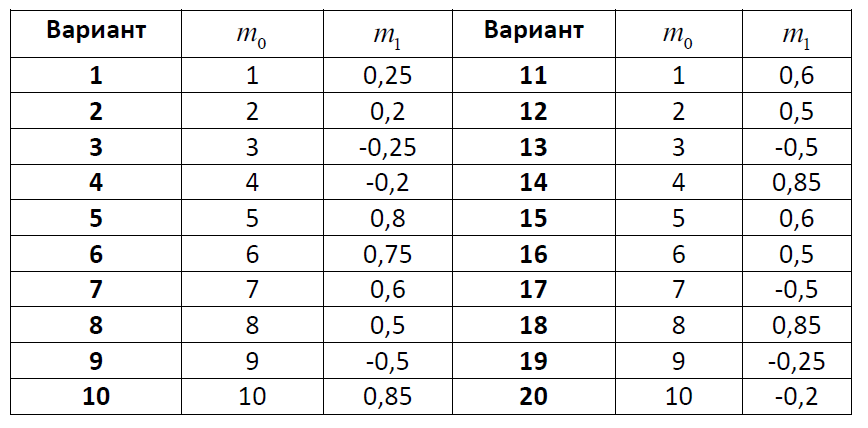

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)
$$x[k]=\left\{ \begin{array}{*{35}{l}}
   \sin \left( \dfrac{2\pi }{N}{{m}_{0}}k \right)+\sin \left( \dfrac{2\pi }{N}\left( {{m}_{0}}+0,25 \right)k \right),\ 0\le k\le N-1;  \\
   0,\ \ \text{при других }k. \right}  \\
\end{array} \right.$$
Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

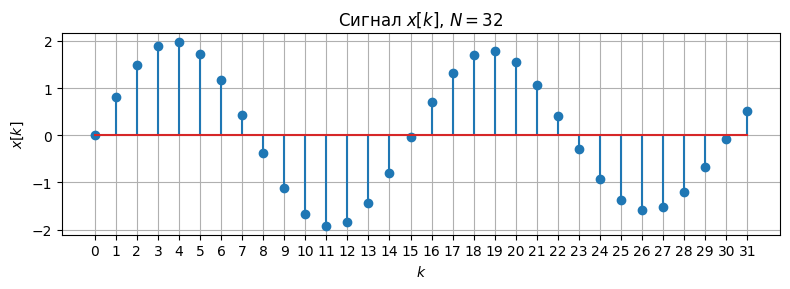

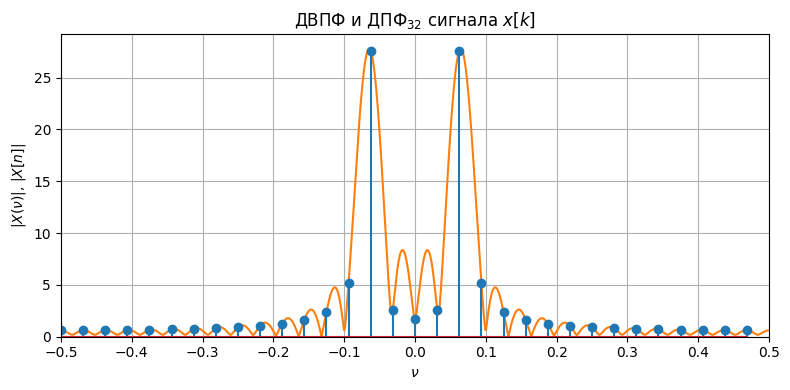

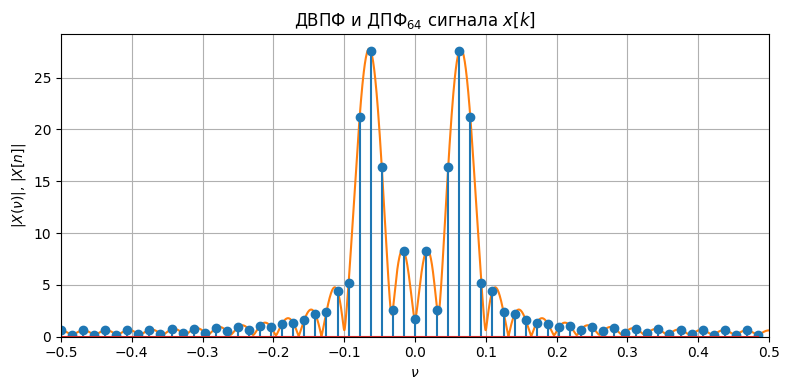

In [27]:
m_0 = 2
m_1 = 0.2
N = 32

x = np.zeros(N)
for k in range(0, N):
    x[k] = np.sin(2 * np.pi / N * m_0 * k) + np.sin(2 * np.pi / N * (m_0 + 0.25) * k)
    
    
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, x)
plt.title(f'Сигнал $x[k]$, $N = {N}$')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.xticks(np.linspace(0, N - 1, N))
plt.grid()
plt.tight_layout()


plt.figure(figsize=[8, 4])

nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M = N
plt.stem(np.arange(M) / M - 0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала $x[k]$' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 4])

nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz = 32
M = N + Nz
plt.stem(np.arange(M) / M - 0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала $x[k]$' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ $\tilde{X}[n]$ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ. 

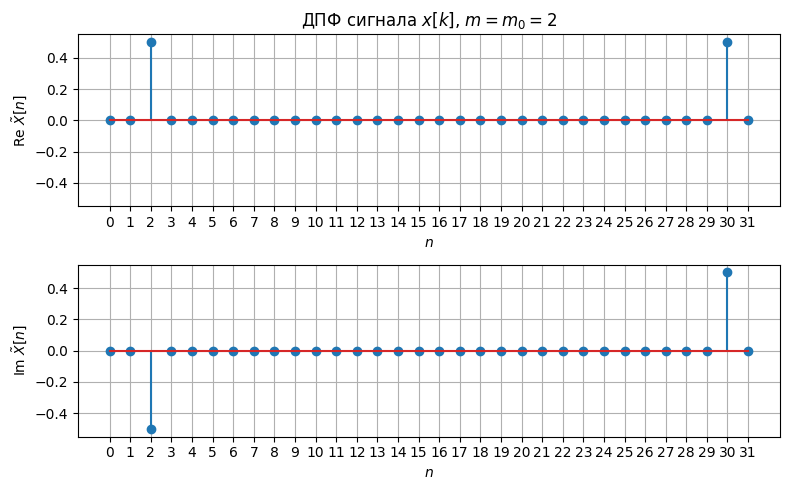

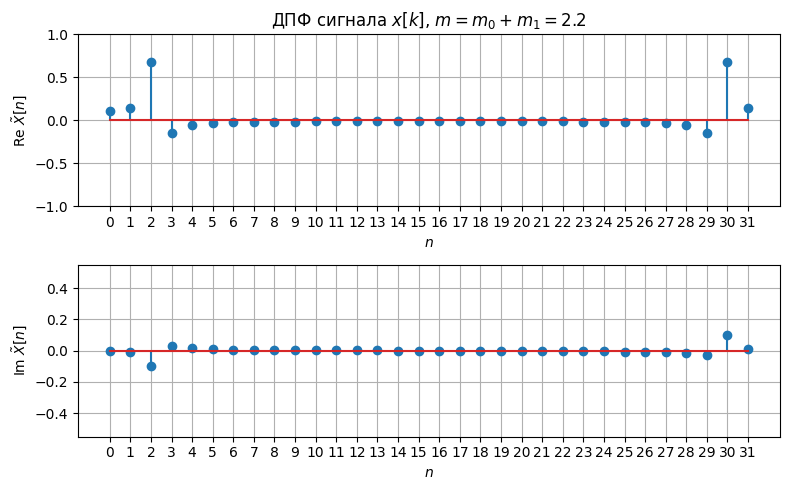

In [32]:
N = 32
k = np.arange(N)

m = m_0
x_N = np.cos(2 * np.pi / N * m * k) + np.sin(2 * np.pi / N * m * k)

X_tilde = np.fft.fft(x_N) / N

plt.figure(figsize=[8, 5])

n = np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, X_tilde.real)
plt.xticks(n)
plt.title(f'ДПФ сигнала $x[k]$, $m = m_0 = {m}$')
plt.xlabel('$n$')
plt.ylabel('Re $\\tilde{X}[n]$')
plt.ylim([-0.55, 0.55])
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, X_tilde.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $\\tilde{X}[n]$')
plt.ylim([-0.55, 0.55])
plt.grid()

plt.tight_layout()


m = m_0 + m_1
x_N = np.cos(2 * np.pi / N * m * k) + np.sin(2 * np.pi / N * m * k)

X_tilde = np.fft.fft(x_N) / N

plt.figure(figsize=[8, 5])

n = np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, X_tilde.real)
plt.xticks(n)
plt.title(f'ДПФ сигнала $x[k]$, $m = m_0 + m_1 = {m}$')
plt.xlabel('$n$')
plt.ylabel('Re $\\tilde{X}[n]$')
plt.ylim([-1, 1])
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, X_tilde.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $\\tilde{X}[n]$')
plt.ylim([-0.55, 0.55])
plt.grid()

plt.tight_layout()

При $m = m_0$:
- ДПФ:  $\tilde{X}[2] = 1/2 + 1/(2j)$, $\tilde{X}[30] = 1/2 - 1/(2j)$, остальные -- 0
- ДВПФ: $X(\nu) = \displaystyle\sum\limits_{n = -\infty}^{n = +\infty}\left(\dfrac{1}{2}\delta\left(\nu - \dfrac{2}{32} - n\right) + \dfrac{1}{2}\delta\left(\nu + \dfrac{2}{32} - n\right) + \dfrac{1}{2j}\delta\left(\nu - \dfrac{2}{32} - n\right) - \dfrac{1}{2j}\delta\left(\nu + \dfrac{2}{32} - n\right) \right)$

# Примеры вычислений на Python для лабораторной работы №2 "ДВПФ и ДПФ"

## Задание последовательности отсчетов

Зададим последовательность из 10 единичных импульсов $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

In [4]:
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
w

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Сделаем тоже самое с помощью функции `ones`

In [5]:
w1=np.ones(10)
w1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Выведем график последовательности $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

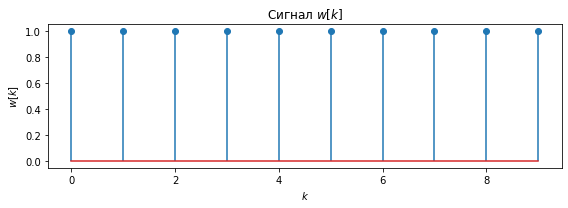

In [6]:
N=len(w)
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

Определим последовательность вида $y[k]=\exp(j2\pi \nu_0 k) w[k]$

In [7]:
k = np.arange(N)
nu_0 = 0.25
y=np.exp(1j*2*np.pi*nu_0*k)
y

array([ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
       -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j,
        1.0000000e+00-2.4492936e-16j,  3.0616170e-16+1.0000000e+00j,
       -1.0000000e+00+3.6739404e-16j, -4.2862638e-16-1.0000000e+00j,
        1.0000000e+00-4.8985872e-16j,  5.5109106e-16+1.0000000e+00j])

Определим дискретную линейную свертку (Convolution) последовательности $w[k]$ c точно такой же последовательностью.

In [8]:
w2=signal.convolve(w, w)
w2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1])

Выведем график для такой последовательности:

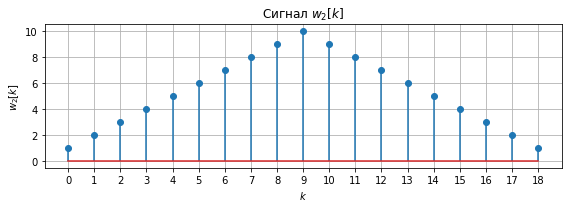

In [9]:
N=len(w2)
k = np.arange(0, N)
plt.figure(figsize=[8, 3])
plt.stem(k, w2)
plt.title('Сигнал $w_2[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_2[k]$')
plt.grid()
plt.xticks(k)
plt.tight_layout()

Поэлементное умножение задается оператором `*`

In [10]:
w2*w2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100,  81,  64,  49,
        36,  25,  16,   9,   4,   1])

## Вычисление ДВПФ

Определим ДВПФ последовательности $w[k]=\sum_{m=0}^{N-1} \mathbf{1}[k-m]$ 

In [11]:
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

In [12]:
nu, W = dtft(w, M=2048)

* `nu` — массив частот $\nu \in [-0.5;0.5)$ с шагом сетки $\Delta \nu =1/M$,
* `W` — значения ДВПФ $W(\nu )$ в этих точках, 
* `dtft` — функция, 
* `w` — последовательность отсчетов, 
* `M` — число точек на сетки оси частот, в которых вычисляется ДВПФ. 

Построим график для модуля ДВПФ

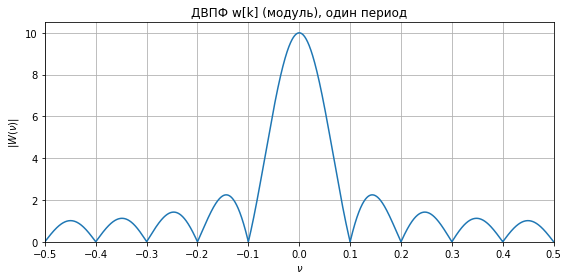

In [13]:
plt.figure(figsize=[8, 4])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Теперь выведем фазовую часть ДВПФ

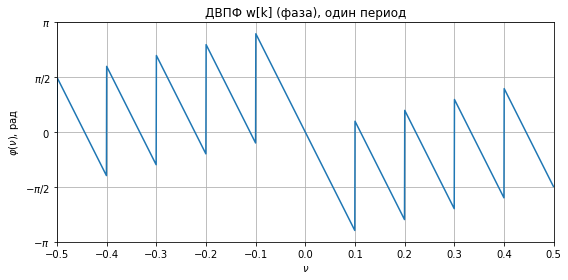

In [14]:
plt.figure(figsize=[8, 4])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Вычисление ДПФ

Вычислим ДПФ $N$-точечной последовательности

$$x[k]=\sin \left(2\pi \frac{2}{N}k\right)+\cos \left(2\pi \frac{3}{N}k\right),\;\;k=0,1,\dots ,N-1,\;\;N=8.$$

Формула прямого ДПФ в данном случае без нормирующего множителя $1/N$:
$$X[n]=\sum_{k=0}^{N-1} x[k]\exp \left(-j2\pi \frac{nk}{N}\right)$$
Сначала воспользуемся матричной формой ДПФ. Функция `scipy.linalg.dft(N)` возвращает матрицу ДПФ $[W]_N$ размера $N\times N$. 


In [15]:
N=8
k=np.arange(N)
x=np.sin(2*np.pi*2/N*k)+np.cos(2*np.pi*3/N*k)
W8 = dft(N)
Xn = W8 @ x
Xn

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        1.13832009e-16-4.00000000e+00j,  4.00000000e+00+2.22044605e-16j,
        1.33226763e-15+7.88860905e-31j,  4.00000000e+00+4.66293670e-15j,
       -5.01463715e-15+4.00000000e+00j,  0.00000000e+00-2.66453526e-15j])

Построим графики. 

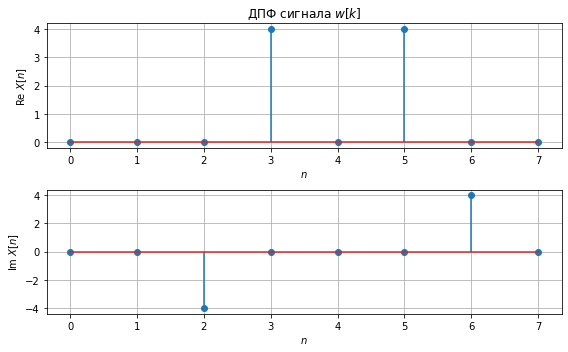

In [16]:
plt.figure(figsize=[8, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ). Для этого воспользуемся функцией `np.fft.fft()`.


In [17]:
Xn1=np.fft.fft(x)
Xn1

array([-3.09256603e-17+0.00000000e+00j,  4.44089210e-16+9.15390196e-17j,
       -1.07929736e-15-4.00000000e+00j,  4.00000000e+00-1.86789586e-15j,
        1.30134197e-15+0.00000000e+00j,  4.00000000e+00+1.86789586e-15j,
       -1.07929736e-15+4.00000000e+00j,  4.44089210e-16-9.15390196e-17j])

Сравним результаты.

In [18]:
max(abs(Xn1-Xn))

4.034322756779725e-15

## Вычисление обратного ДПФ


Матрица обратного ДПФ может быть найдена как обратная матрица для $[W]_N$.

In [19]:
W8_inv1 = np.linalg.inv(W8)

Также ее можно получить с помощью транспонирования и комплексного сопряжения (эрмитова сопряжения) c дополнительной нормировкой на $N$, в силу того, что $[W]_N^{-1} =\frac{1}{N}{\left([W]_N^T \right)}^* =\frac{1}{N}[W]_N^*$. 


In [20]:
W8_inv2 = np.conjugate(W8) / N

Вычислим обратное ДПФ, используя матричную форму. Сравним результат с исходной последовательностью. 


In [21]:
x1 = W8_inv1 @ Xn
max(abs(x1-x))

7.901860134932568e-16

Выполним те же вычисления с использованием алгоритма БПФ. Для этого нам понадобится функция `np.fft.ifft()`

In [22]:
x2=np.fft.ifft(Xn)
max(abs(x2-x))

1.4861185472553567e-15

## Интерполяция ДВПФ добавлением нулевых отсчетов

Построим на одном графике модули ДПФ и ДВПФ $N$-точечной последовательности ($N=16$)

$$x[k]=\sin \left(2\pi \frac{5.5}{16} k \right),\;\;k=0,1,\dots ,N-1.$$

In [23]:
N=16
k=np.arange(N)
n=np.arange(N)
x=np.sin(2*np.pi*5.5*k/N)

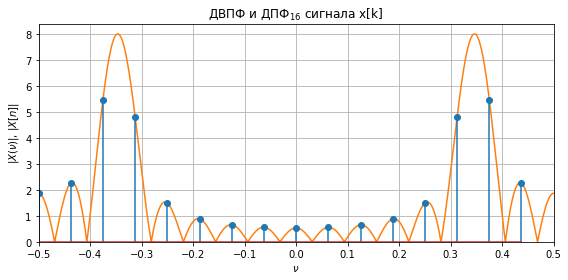

In [26]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M=N
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Здесь функция `np.fft.fftshift` позволяет циклически сдвинуть вычисленные отсчеты ДПФ так, чтобы они соответствовали частотам$\nu_n \in [-0.5;0.5)$, $\nu_n =-0.5+\frac{n}{N}.$

Относительная частота синусойды $\nu_0 =\frac{6.5}{16}$ не попадет на сетку частот ДПФ. В результате спектральные максимумы недостаточно хорошо визуализируются отсчетами ДПФ. Чтобы это улучшить, добавим к последовательности, используемой при вычислении ДПФ, нулевые отсчеты в конец сигнала. Для этого досточно указать второй параметр функции `np.fft.fft(x, M)` равный новому числу отсчетов. 


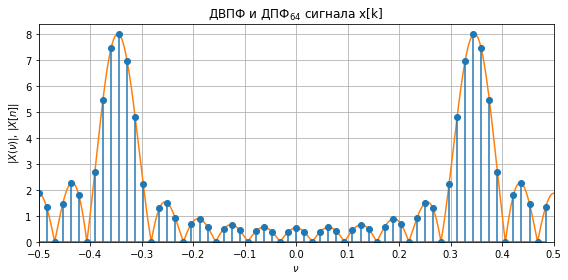

In [27]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz=48
M=N+Nz
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()